___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows = None
pd.options.display.max_columns = None
plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
# warnings.warn("this will not show")



In [2]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
# Check python version
!python --version

Python 3.10.9


In [4]:
# Check tensorflow version
import tensorflow as tf

tf.__version__

'2.13.0'

In [5]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session")
else:
    print("CPU will be used for this session")

CPU will be used for this session


In [6]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [8]:
df.shape

(10000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


So our dataset contains different data types like int , object ,float.

In [10]:
df= df.apply(lambda x: x.astype(float) if x.dtype=="int64" else x)

In [11]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.000,15634602.000,Hargrave,619.000,France,Female,42.000,2.000,0.000,1.000,1.000,1.000,101348.880,1.000
1,2.000,15647311.000,Hill,608.000,Spain,Female,41.000,1.000,83807.860,1.000,0.000,1.000,112542.580,0.000
2,3.000,15619304.000,Onio,502.000,France,Female,42.000,8.000,159660.800,3.000,1.000,0.000,113931.570,1.000
3,4.000,15701354.000,Boni,699.000,France,Female,39.000,1.000,0.000,2.000,0.000,0.000,93826.630,0.000
4,5.000,15737888.000,Mitchell,850.000,Spain,Female,43.000,2.000,125510.820,1.000,1.000,1.000,79084.100,0.000
5,6.000,15574012.000,Chu,645.000,Spain,Male,44.000,8.000,113755.780,2.000,1.000,0.000,149756.710,1.000
6,7.000,15592531.000,Bartlett,822.000,France,Male,50.000,7.000,0.000,2.000,1.000,1.000,10062.800,0.000
7,8.000,15656148.000,Obinna,376.000,Germany,Female,29.000,4.000,115046.740,4.000,1.000,0.000,119346.880,1.000
8,9.000,15792365.000,He,501.000,France,Male,44.000,4.000,142051.070,2.000,0.000,1.000,74940.500,0.000
9,10.000,15592389.000,H?,684.000,France,Male,27.000,2.000,134603.880,1.000,1.000,1.000,71725.730,0.000


In [12]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.duplicated().sum()

0

There are no unique values

Removing the columns of "rownumber", "customerid", "surname" from the given dataset since they do NOT have any contribution to classification in our analysis.

In [14]:
df.drop(["CustomerId", "RowNumber", "Surname"], axis=1, inplace=True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.000,France,Female,42.000,2.000,0.000,1.000,1.000,1.000,101348.880,1.000
1,608.000,Spain,Female,41.000,1.000,83807.860,1.000,0.000,1.000,112542.580,0.000
2,502.000,France,Female,42.000,8.000,159660.800,3.000,1.000,0.000,113931.570,1.000
3,699.000,France,Female,39.000,1.000,0.000,2.000,0.000,0.000,93826.630,0.000
4,850.000,Spain,Female,43.000,2.000,125510.820,1.000,1.000,1.000,79084.100,0.000


Getting rid of commas in the column of "balance" and "estimatedsalary"

In [16]:
pd.options.display.float_format = '{:}'.format

In [17]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2.0,0.0,1.0,1.0,1.0,101348.88,1.0
1,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,France,Female,42.0,8.0,159660.8,3.0,1.0,0.0,113931.57,1.0


In [18]:
df.describe(include=object).T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [19]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [20]:
#finding how many unique values numerical features have
# Importing the necessary library
from termcolor import colored

# Your existing code
for col in df.select_dtypes(include=[np.number]).columns:
    print(colored(f"{col}", 'red', attrs=['bold']), f"feature has", colored(f"{df[col].nunique()}", 'green', attrs=['bold']), f"unique values.")


CreditScore feature has 460 unique values.
Age feature has 70 unique values.
Tenure feature has 11 unique values.
Balance feature has 6382 unique values.
NumOfProducts feature has 4 unique values.
HasCrCard feature has 2 unique values.
IsActiveMember feature has 2 unique values.
EstimatedSalary feature has 9999 unique values.
Exited feature has 2 unique values.


In [21]:
df.duplicated().value_counts()

False    10000
dtype: int64

In [22]:
df.shape

(10000, 11)

In [23]:
df.isnull().melt(value_name="missing").sum()

variable    CreditScoreCreditScoreCreditScoreCreditScoreCr...
missing                                                     0
dtype: object

Examining of the Target Variable


In [24]:
def first_look(variable_name):
    # Add your code here to examine the variable
    # For example:
    print(f"Examining the '{variable_name}' variable.")
    # ...rest of your code...

# Now you can call the function in the focal cell
first_look('Exited')

Examining the 'Exited' variable.


Overall Distribution of Target ("exited") Variable.

Percentage of "being churn": 20.37% (2037 churn cases out of 10000)
Percentage of "NOT being churn": 79.63% (7963 NOT churn cases out of 10000)


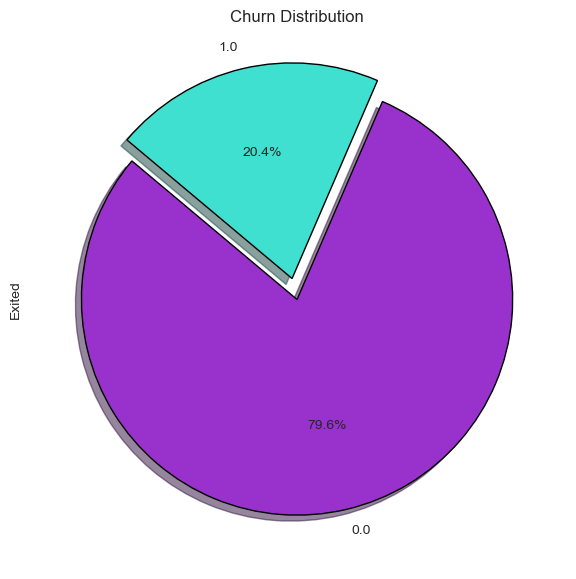

In [25]:
# Calculate percentage of "being churn" and "NOT being churn"
churn_percentage = round(df["Exited"].value_counts(normalize=True)[1] * 100, 2)
not_churn_percentage = round(df["Exited"].value_counts(normalize=True)[0] * 100, 2)

# Count churn and NOT churn cases
churn_cases = df["Exited"].value_counts()[1]
not_churn_cases = df["Exited"].value_counts()[0]

# Print the percentages and counts
print(f'Percentage of \033[1m"being churn"\033[0m: {churn_percentage}% ({churn_cases} churn cases out of {len(df)})')
print(f'Percentage of \033[1m"NOT being churn"\033[0m: {not_churn_percentage}% ({not_churn_cases} NOT churn cases out of {len(df)})')

explode = [0, 0.1]

df["Exited"].value_counts().plot(kind="pie", 
                                 autopct='%1.1f%%', 
                                 figsize=(7, 7), 
                                 explode=explode, 
                                 wedgeprops={'edgecolor': 'black'}, 
                                 shadow=True, 
                                 colors=['darkorchid', 'turquoise'], 
                                 startangle=140)
plt.title('Churn Distribution')
plt.show()

<Axes: ylabel='Frequency'>

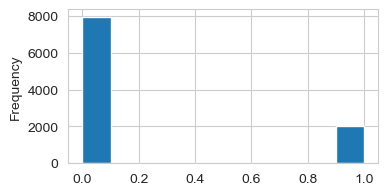

In [26]:
plt.figure(figsize=(4, 2))
df['Exited'].plot(kind='hist')

Multicollinearity

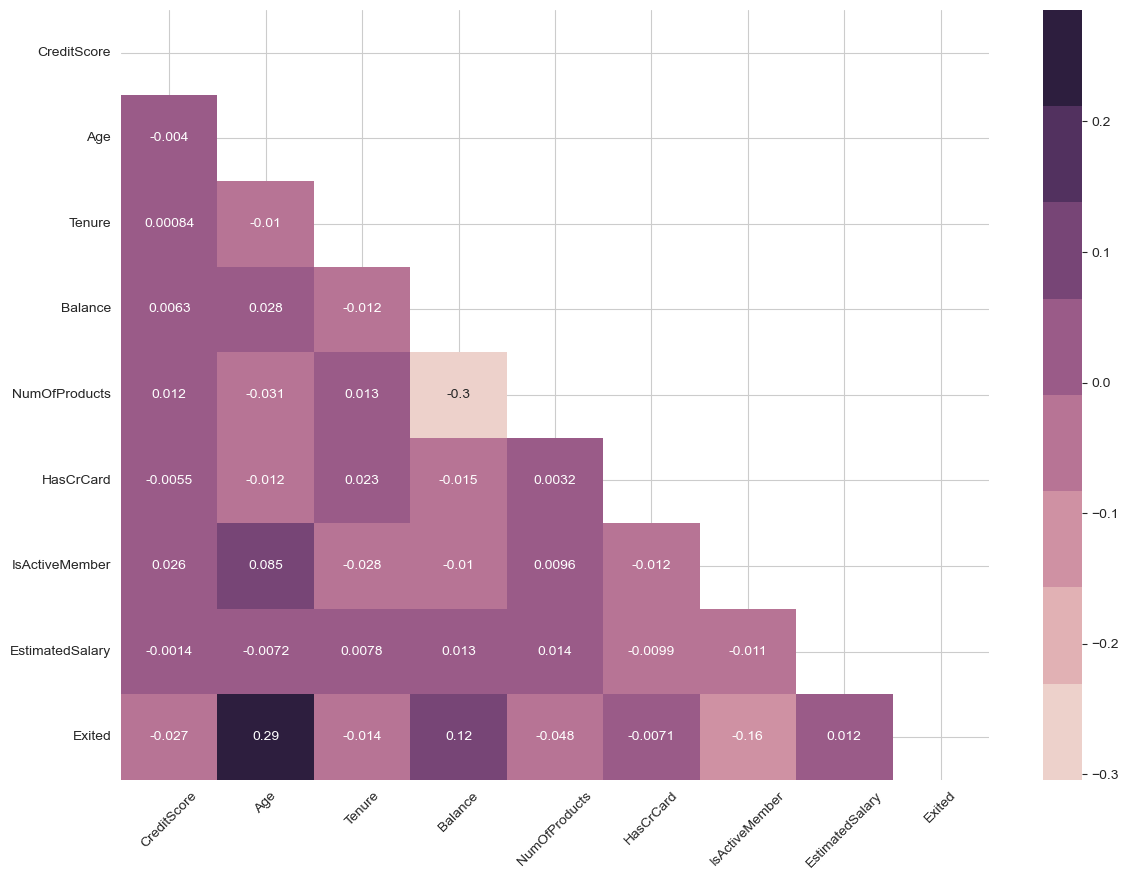

In [27]:
plt.figure(figsize=(14, 10))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.corr())

# using the upper triangle matrix as mask 
sns.heatmap(df.corr(), annot=True, cmap = sns.cubehelix_palette(8), mask=matrix)

plt.xticks(rotation=45);

- It can be concluded that there has been weak correlations between the numerical features and the target variable. 
- it can be concluded that there is no multi-colliniearity problem among the variables".
- On the other hand it can be safely assumed that while our target variable of 'exited' demonstrates a slight negative correlation with the variables of "creditscore", "tenure", "numberofproducts" 'hascrcard' and 'isactivemember', 
- it demonstrates slight positive correlation with the variables of 'age', 'balance' and 'estimatedsalary".**

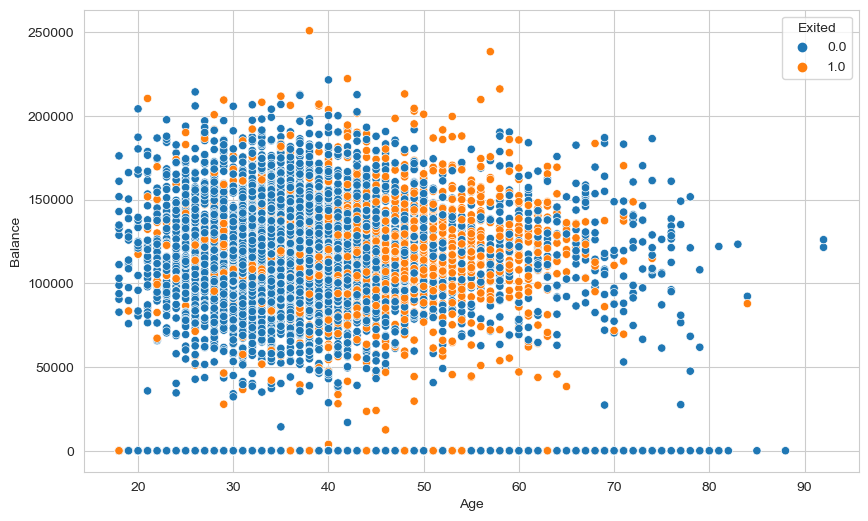

In [28]:
sns.scatterplot(data=df, x="Age", y="Balance", hue="Exited");

In [29]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [30]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [31]:
df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [32]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0,1,42.0,2.0,0.0,1.0,1.0,1.0,101348.88,1.0
1,608.0,2,1,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,0,1,42.0,8.0,159660.8,3.0,1.0,0.0,113931.57,1.0
3,699.0,0,1,39.0,1.0,0.0,2.0,0.0,0.0,93826.63,0.0
4,850.0,2,1,43.0,2.0,125510.82,1.0,1.0,1.0,79084.1,0.0
5,645.0,2,0,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1.0
6,822.0,0,0,50.0,7.0,0.0,2.0,1.0,1.0,10062.8,0.0
7,376.0,1,1,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1.0
8,501.0,0,0,44.0,4.0,142051.07,2.0,0.0,1.0,74940.5,0.0
9,684.0,0,0,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,0.0


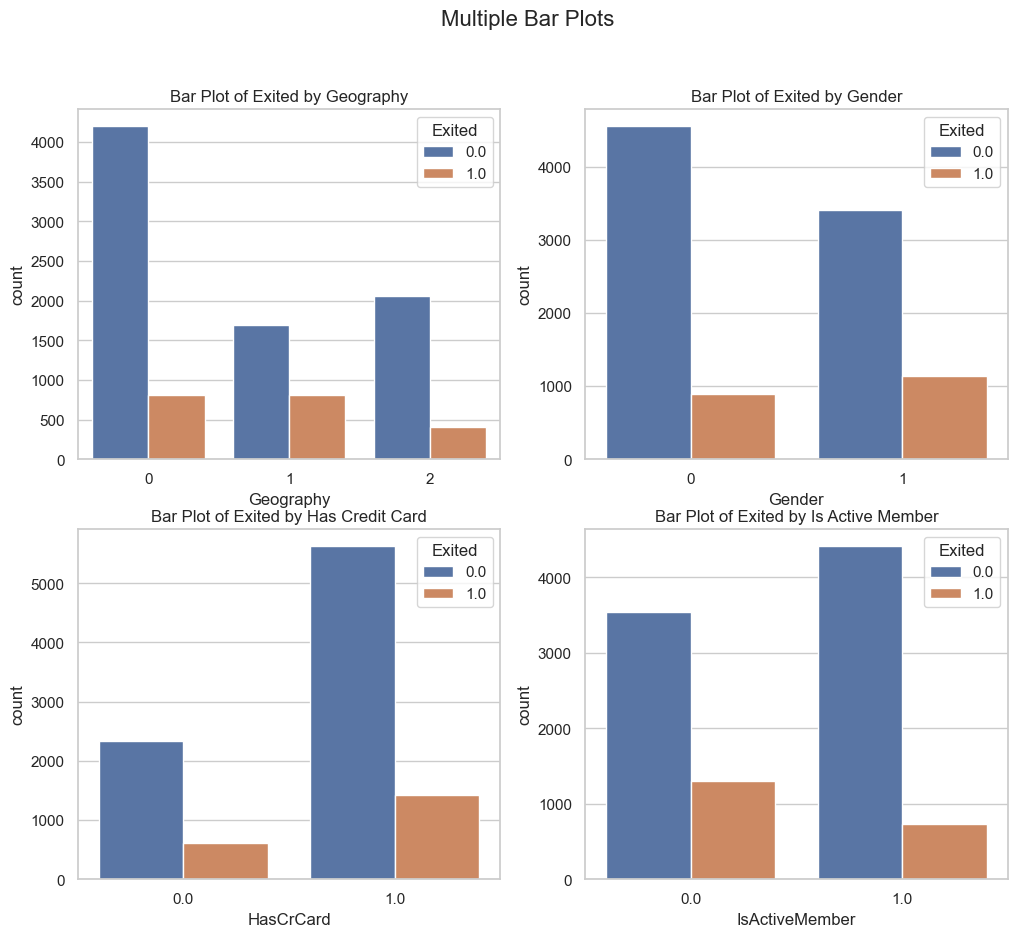

In [33]:
sns.set(style="whitegrid")

# Create a 2x2 grid of bar plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1
sns.countplot(x='Geography', hue='Exited', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Bar Plot of Exited by Geography')

# Plot 2
sns.countplot(x='Gender', hue='Exited', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Bar Plot of Exited by Gender')

# Plot 3
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Bar Plot of Exited by Has Credit Card')

# Plot 4
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Bar Plot of Exited by Is Active Member')

# Adjust the overall title for the entire subplot grid
plt.suptitle('Multiple Bar Plots', fontsize=16)

# Show the plot
plt.show()


- Majority of the data is from persons from France. 
- The proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
- The proportion of female customers churning is also greater than that of male customers
- Interestingly, majority of the customers that churned are those with credit cards. 
- Given that majority of the customers have credit cards could prove this to be just a coincidence.
- Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

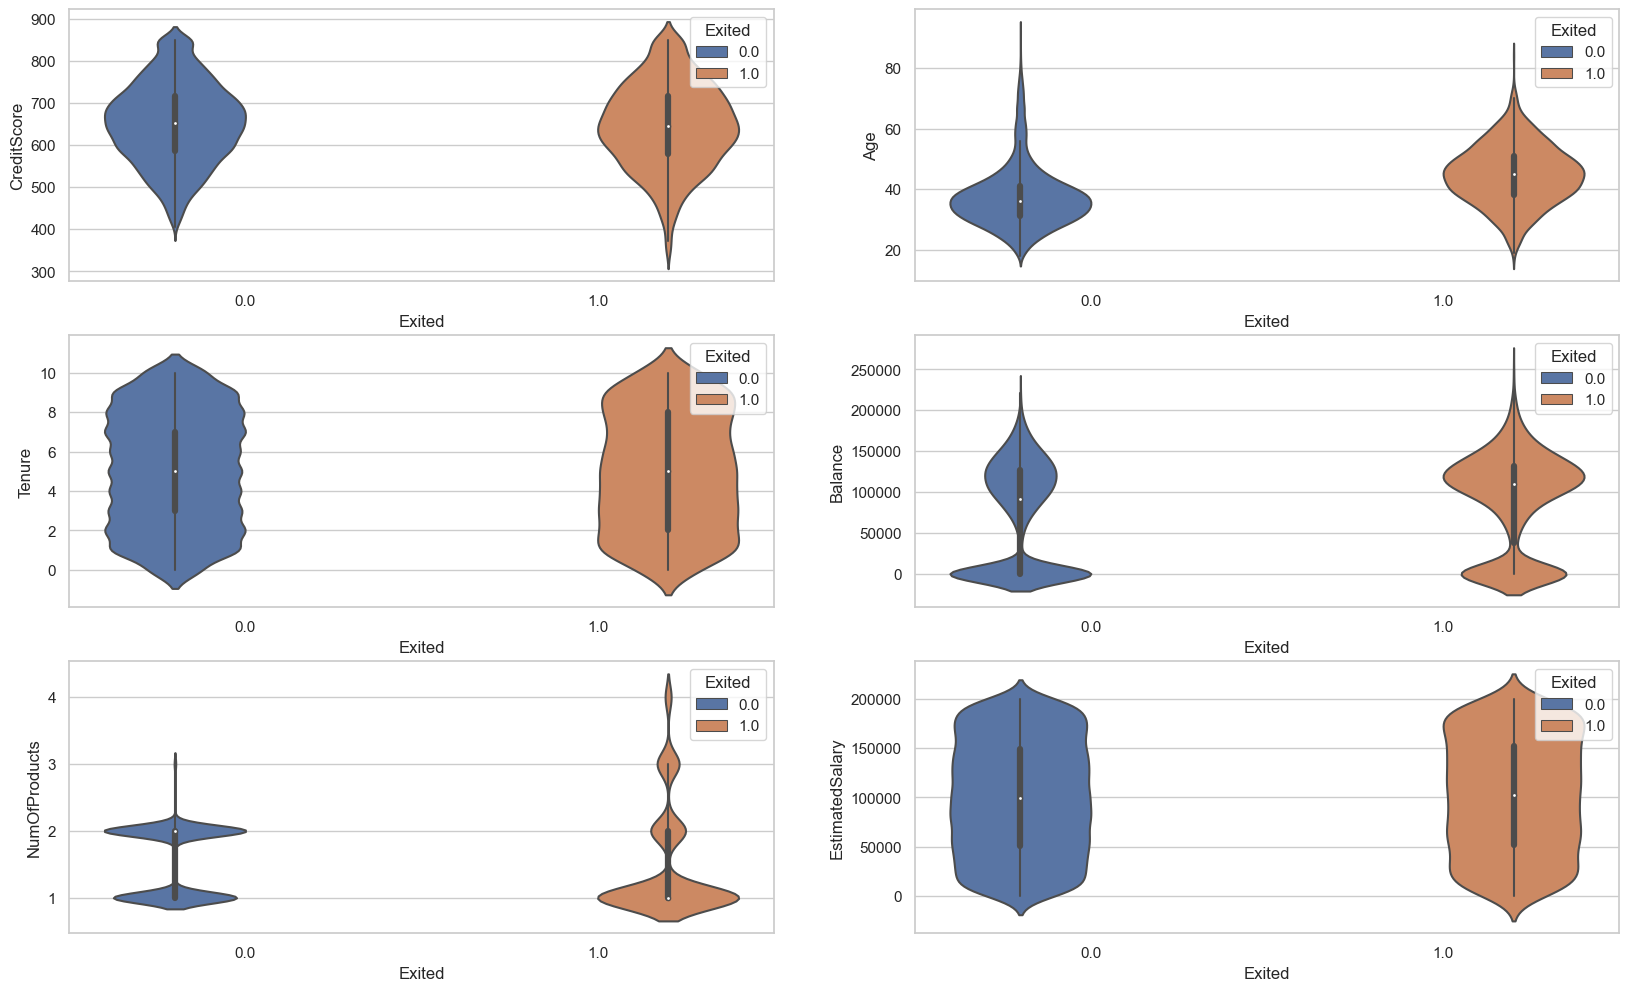

In [34]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))

sns.violinplot(y='CreditScore', x='Exited', hue='Exited', data=df, ax=axarr[0][0])
sns.violinplot(y='Age', x='Exited', hue='Exited', data=df, ax=axarr[0][1])
sns.violinplot(y='Tenure', x='Exited', hue='Exited', data=df, ax=axarr[1][0])
sns.violinplot(y='Balance', x='Exited', hue='Exited', data=df, ax=axarr[1][1])
sns.violinplot(y='NumOfProducts', x='Exited', hue='Exited', data=df, ax=axarr[2][0])
sns.violinplot(y='EstimatedSalary', x='Exited', hue='Exited', data=df, ax=axarr[2][1])

plt.show()





<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

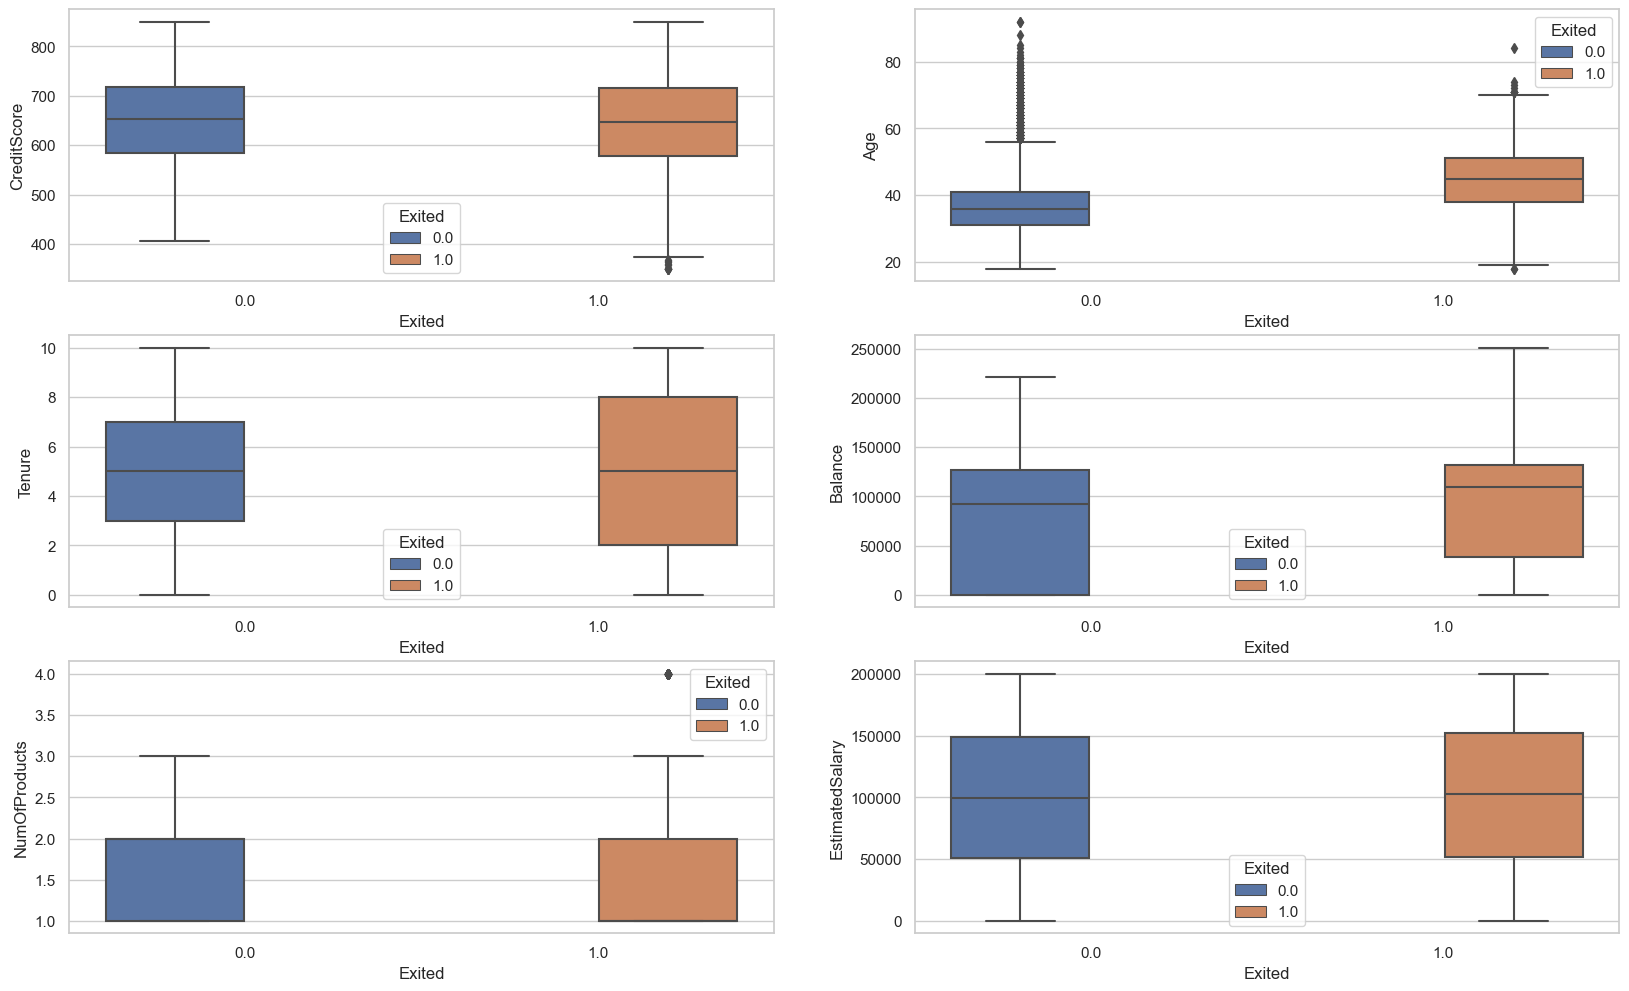

In [35]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

- There is no significant difference in the credit score distribution between retained and churned customers.
- The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories.
- The bank may need to review their target market or review the strategy for retention between the different age groups 
- Regarding to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
- The bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
Neither the product nor the salary has a significant effect on the likelihood to churn.

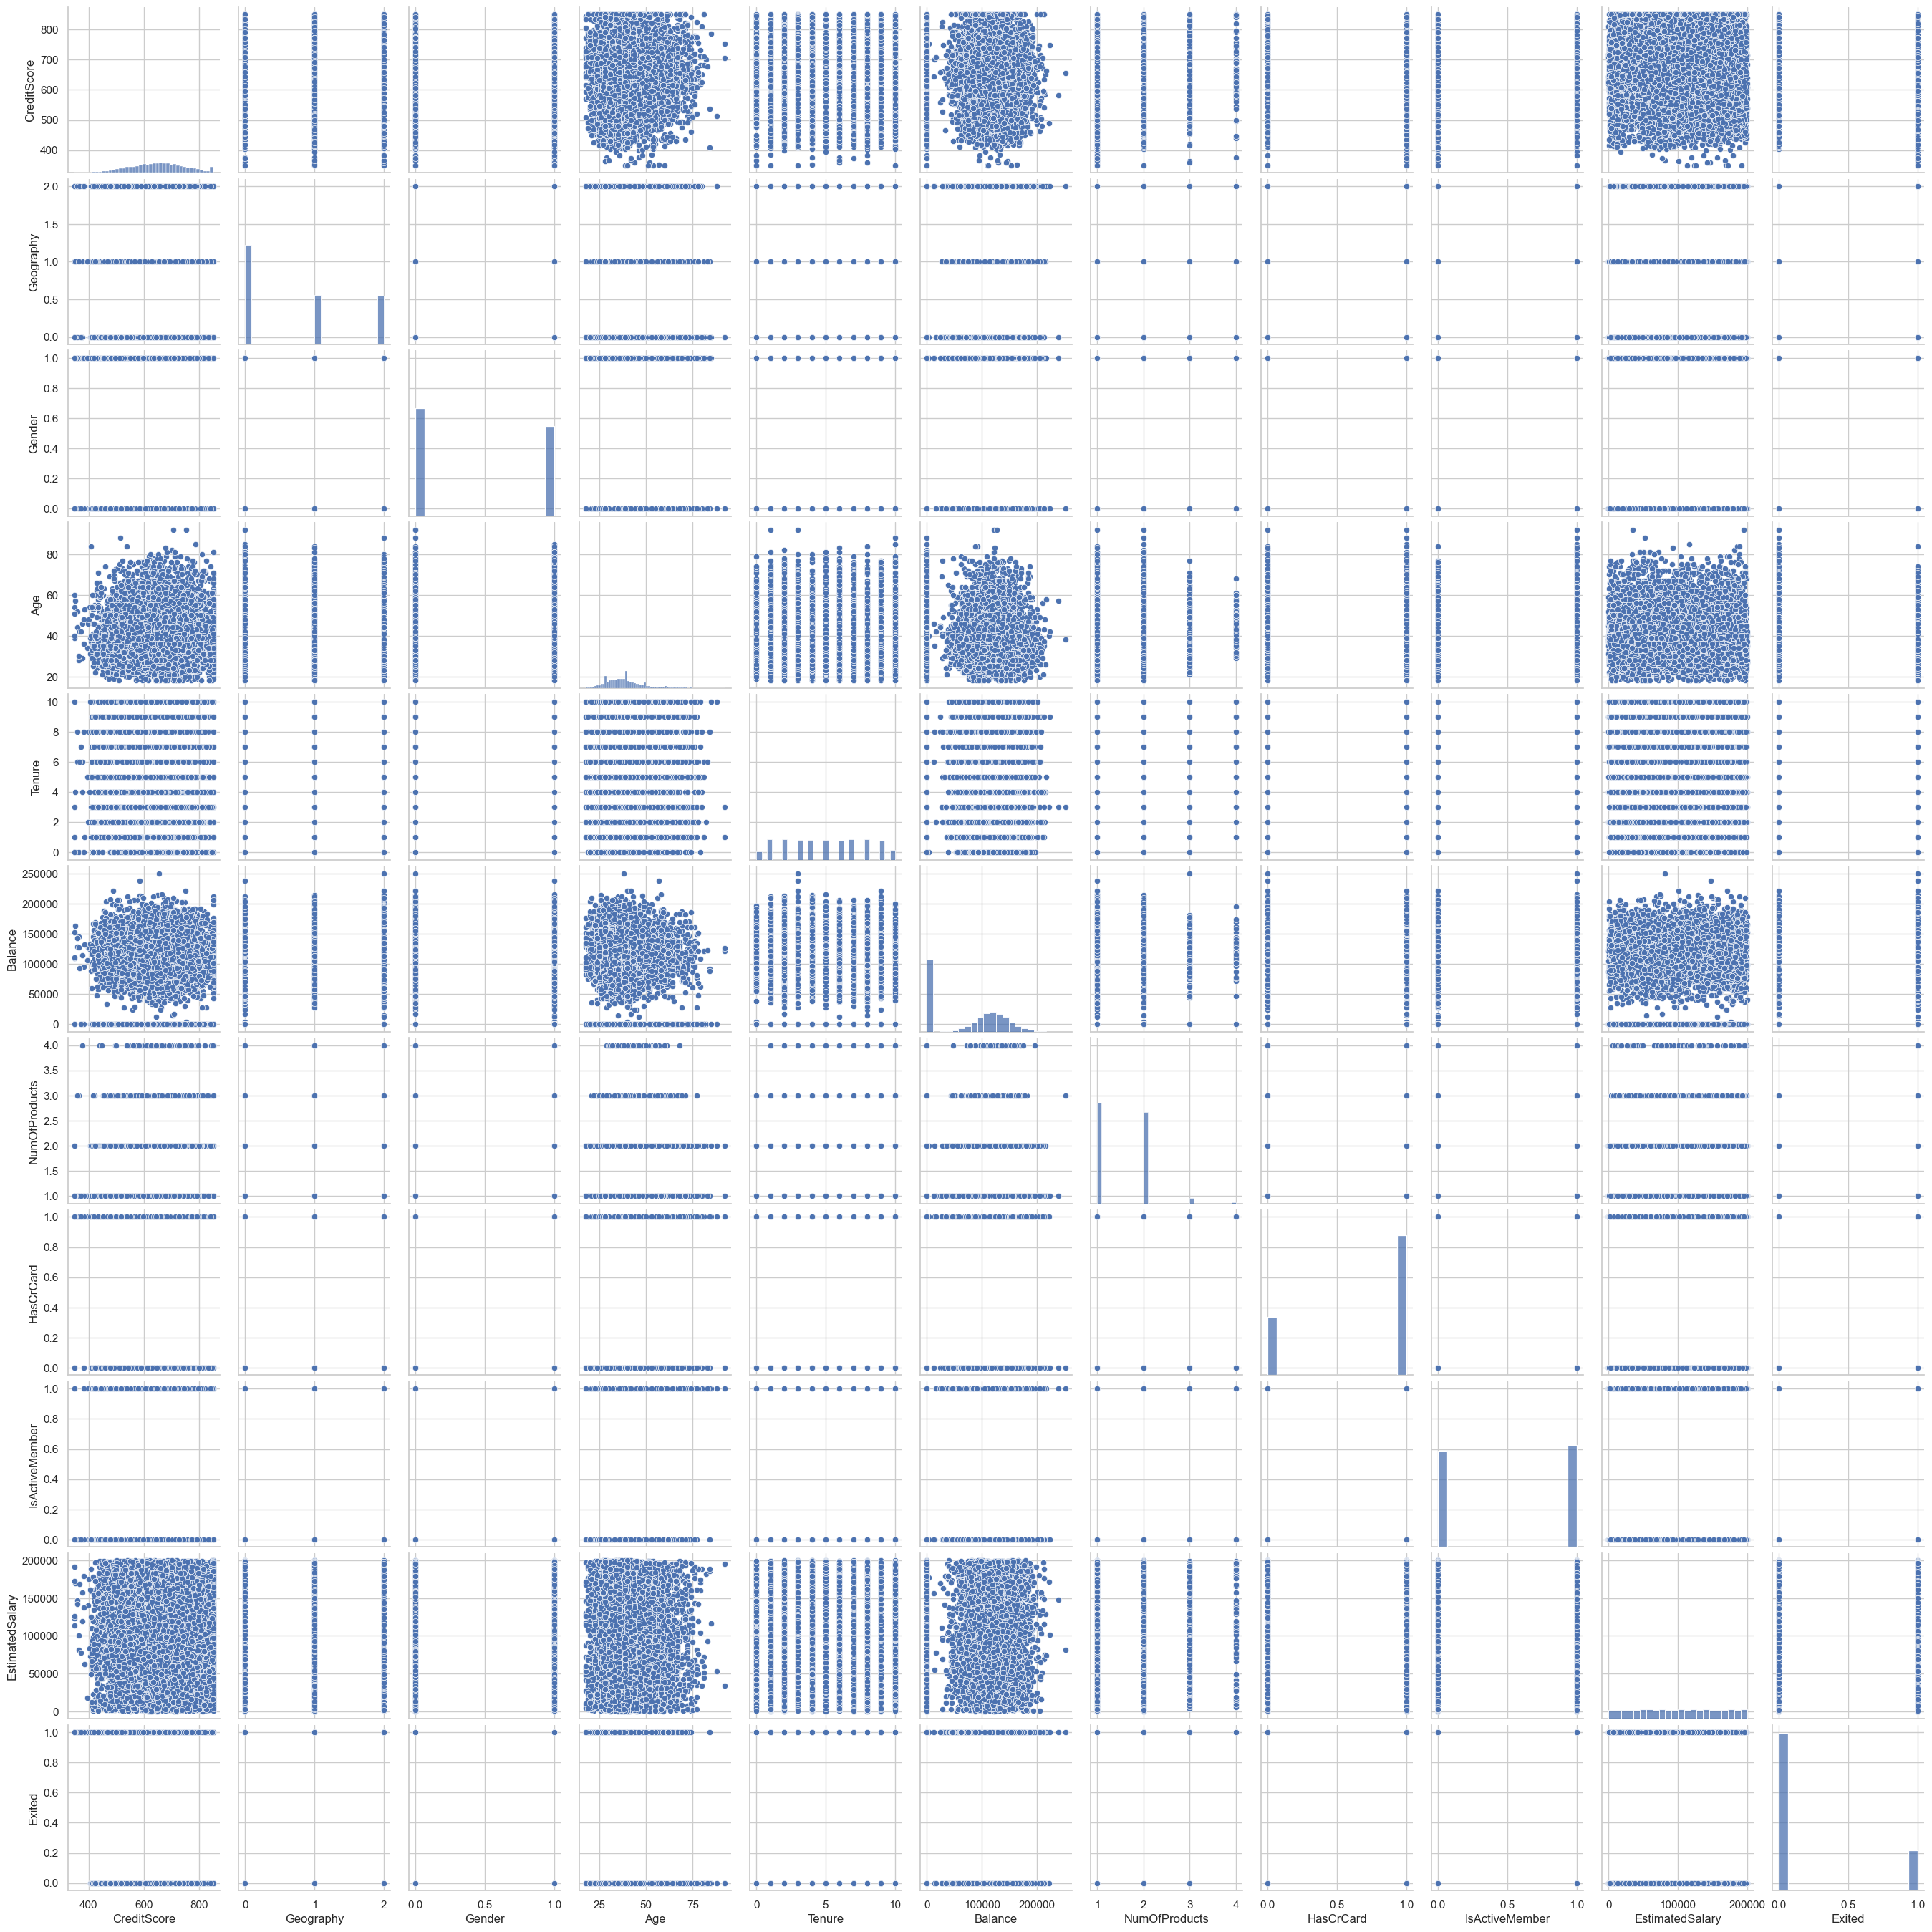

In [36]:
sns.pairplot(df)
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [38]:
df.insert(len(df.columns), 'Churn', df['Exited'])

In [39]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
0,619.0,0,1,42.0,2.0,0.0,1.0,1.0,1.0,101348.88,1.0,1.0
1,608.0,2,1,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0
2,502.0,0,1,42.0,8.0,159660.8,3.0,1.0,0.0,113931.57,1.0,1.0
3,699.0,0,1,39.0,1.0,0.0,2.0,0.0,0.0,93826.63,0.0,0.0
4,850.0,2,1,43.0,2.0,125510.82,1.0,1.0,1.0,79084.1,0.0,0.0
5,645.0,2,0,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1.0,1.0
6,822.0,0,0,50.0,7.0,0.0,2.0,1.0,1.0,10062.8,0.0,0.0
7,376.0,1,1,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1.0,1.0
8,501.0,0,0,44.0,4.0,142051.07,2.0,0.0,1.0,74940.5,0.0,0.0
9,684.0,0,0,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,0.0,0.0


In [40]:
df.drop('Exited', axis =1, inplace= True)

 Train Test Split Operations

In [176]:
X = df.drop('Churn', axis=1)
y = df['Churn'].values

In [42]:
seed = 42

In [43]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=seed)

Scaling data

In [44]:

scaler = MinMaxScaler()

In [45]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [46]:
#!pip install --upgrade tensorflow

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [49]:
X_train.shape

(8000, 10)

In [50]:
y_train.shape

(8000,)

Modelling Without "class_weigth"

In [52]:
model = Sequential()

model.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))  # output binary olduğu için sigmoid kullandık. 

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# Train the model and store the training history
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=((X_test, y_test)))

Epoch 1/1000
250/250 [==============================] - 8s 13ms/step - loss: 0.5102 - accuracy: 0.7720 - val_loss: 0.4600 - val_accuracy: 0.8035
Epoch 2/1000
250/250 [==============================] - 2s 8ms/step - loss: 0.4545 - accuracy: 0.8023 - val_loss: 0.4306 - val_accuracy: 0.8120
Epoch 3/1000
250/250 [==============================] - 2s 7ms/step - loss: 0.4340 - accuracy: 0.8125 - val_loss: 0.4096 - val_accuracy: 0.8205
Epoch 4/1000
250/250 [==============================] - 2s 8ms/step - loss: 0.4113 - accuracy: 0.8274 - val_loss: 0.3876 - val_accuracy: 0.8335
Epoch 5/1000
250/250 [==============================] - 2s 8ms/step - loss: 0.3864 - accuracy: 0.8400 - val_loss: 0.3700 - val_accuracy: 0.8470
Epoch 6/1000
250/250 [==============================] - 2s 7ms/step - loss: 0.3702 - accuracy: 0.8486 - val_loss: 0.3622 - val_accuracy: 0.8505
Epoch 7/1000
250/250 [==============================] - 2s 7ms/step - loss: 0.3650 - accuracy: 0.8484 - val_loss: 0.3549 - val_accuracy

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.5101686120033264,0.7720000147819519,0.46000826358795166,0.8034999966621399
1,0.4545479416847229,0.8022500276565552,0.430580198764801,0.8119999766349792
2,0.433963418006897,0.8125,0.4096185863018036,0.8205000162124634
3,0.4113236963748932,0.8273749947547913,0.38759270310401917,0.8335000276565552
4,0.3863978385925293,0.8399999737739563,0.37002676725387573,0.847000002861023


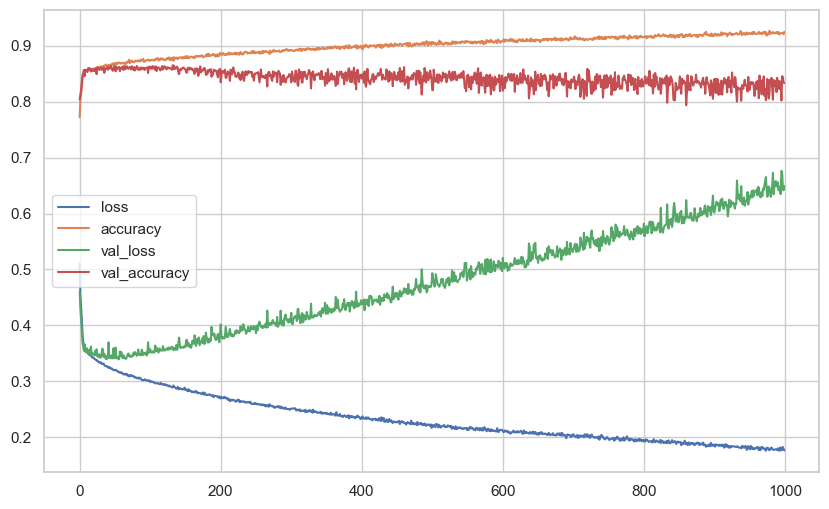

In [55]:
loss_df.plot()
plt.show()


In [56]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.6491248607635498
accuracy :  0.8330000042915344


In [57]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")   

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 1s 3ms/step
[[1463  144]
 [ 190  203]]
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      1607
         1.0       0.59      0.52      0.55       393

    accuracy                           0.83      2000
   macro avg       0.74      0.71      0.72      2000
weighted avg       0.83      0.83      0.83      2000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [58]:
from tensorflow import keras
from sklearn.utils.class_weight import compute_class_weight
from tensorflow import keras

In [60]:

# Compute class weights based on the training data
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Build the ANN model
model_weighted = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Change 'softmax' to 'sigmoid'
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weight_dict)

Epoch 1/100
250/250 [==============================] - 7s 11ms/step - loss: 0.2365 - accuracy: 0.8866 - val_loss: 0.7320 - val_accuracy: 0.7700
Epoch 2/100
250/250 [==============================] - 2s 8ms/step - loss: 0.2307 - accuracy: 0.8945 - val_loss: 0.7301 - val_accuracy: 0.7695
Epoch 3/100
250/250 [==============================] - 2s 8ms/step - loss: 0.2324 - accuracy: 0.8894 - val_loss: 0.7385 - val_accuracy: 0.7705
Epoch 4/100
250/250 [==============================] - 2s 7ms/step - loss: 0.2259 - accuracy: 0.8961 - val_loss: 0.7414 - val_accuracy: 0.7645
Epoch 5/100
250/250 [==============================] - 2s 7ms/step - loss: 0.2309 - accuracy: 0.8924 - val_loss: 0.7391 - val_accuracy: 0.7670
Epoch 6/100
250/250 [==============================] - 2s 7ms/step - loss: 0.2296 - accuracy: 0.8890 - val_loss: 0.7783 - val_accuracy: 0.7530
Epoch 7/100
250/250 [==============================] - 2s 7ms/step - loss: 0.2240 - accuracy: 0.8926 - val_loss: 0.7353 - val_accuracy: 0.767

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
model.summary()

In [62]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")



63/63 [==============================] - 1s 5ms/step - loss: 0.7586 - accuracy: 0.7810
Test loss: 0.7586, Test accuracy: 0.7810


In [63]:
model.evaluate(X_test, y_test, verbose=0)

[0.7585621476173401, 0.781000018119812]

In [65]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.7585621476173401
accuracy :  0.781000018119812


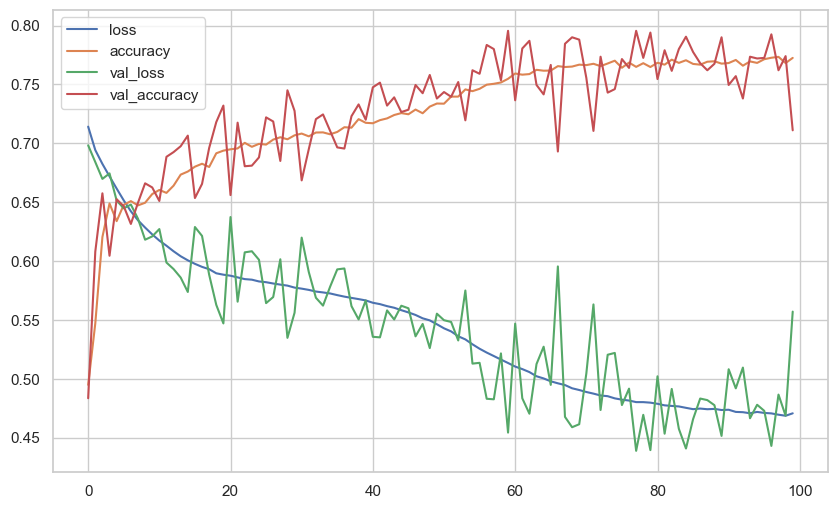

In [70]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [66]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 1s 4ms/step
[[1324  283]
 [ 155  238]]
              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86      1607
         1.0       0.46      0.61      0.52       393

    accuracy                           0.78      2000
   macro avg       0.68      0.71      0.69      2000
weighted avg       0.81      0.78      0.79      2000



63/63 [==============================] - 0s 4ms/step


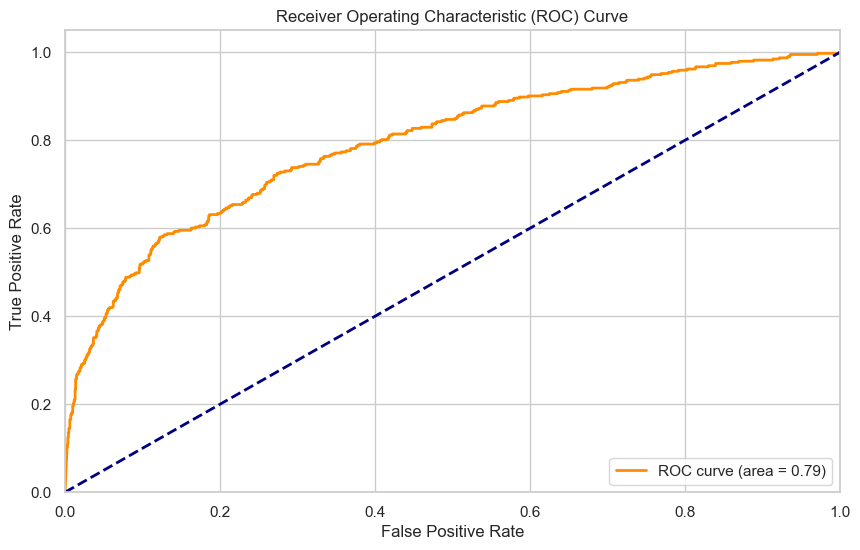

AUC Score: 0.7935241967790407


In [67]:

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc
# Make prediction to get probabilities
y_pred_prob = model.predict(X_test)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [68]:
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])
learning_rate = 0.01  # You can adjust this value as needed


optimizer = keras.optimizers.SGD(learning_rate=0.01)
# Create an optimizer with the desired learning rate
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

# Compile the model with the optimizer and the correct loss function
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [69]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weight_dict)

Epoch 1/100
250/250 [==============================] - 5s 11ms/step - loss: 0.7141 - accuracy: 0.4949 - val_loss: 0.6982 - val_accuracy: 0.4835
Epoch 2/100
250/250 [==============================] - 2s 7ms/step - loss: 0.6942 - accuracy: 0.5470 - val_loss: 0.6841 - val_accuracy: 0.6080
Epoch 3/100
250/250 [==============================] - 2s 8ms/step - loss: 0.6825 - accuracy: 0.6204 - val_loss: 0.6697 - val_accuracy: 0.6575
Epoch 4/100
250/250 [==============================] - 2s 8ms/step - loss: 0.6719 - accuracy: 0.6489 - val_loss: 0.6744 - val_accuracy: 0.6045
Epoch 5/100
250/250 [==============================] - 2s 7ms/step - loss: 0.6615 - accuracy: 0.6339 - val_loss: 0.6514 - val_accuracy: 0.6525
Epoch 6/100
250/250 [==============================] - 2s 7ms/step - loss: 0.6515 - accuracy: 0.6478 - val_loss: 0.6447 - val_accuracy: 0.6465
Epoch 7/100
250/250 [==============================] - 2s 7ms/step - loss: 0.6423 - accuracy: 0.6509 - val_loss: 0.6479 - val_accuracy: 0.631

In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                352       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 897 (3.50 KB)
Trainable params: 897 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.7141109704971313,0.4948750138282776,0.6982483863830566,0.48350000381469727
1,0.6942359209060669,0.546999990940094,0.6840550303459167,0.6079999804496765
2,0.6824837327003479,0.6203749775886536,0.669745683670044,0.6575000286102295
3,0.6719022989273071,0.6488749980926514,0.6744269728660583,0.6044999957084656
4,0.6615443229675293,0.6338750123977661,0.6513800024986267,0.6524999737739563


In [74]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.557057797908783
accuracy:  0.7110000252723694


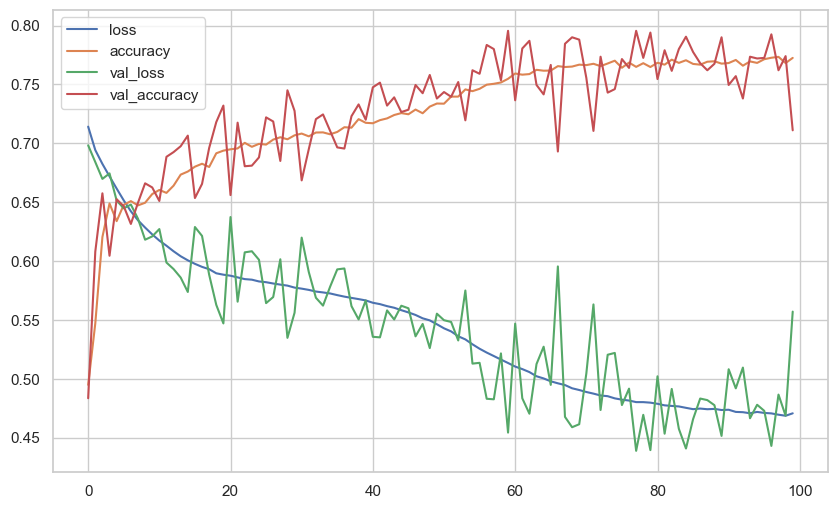

In [73]:
loss_df.plot()
plt.show()

In [76]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 1s 3ms/step
[[1099  508]
 [  70  323]]
              precision    recall  f1-score   support

         0.0       0.94      0.68      0.79      1607
         1.0       0.39      0.82      0.53       393

    accuracy                           0.71      2000
   macro avg       0.66      0.75      0.66      2000
weighted avg       0.83      0.71      0.74      2000



### Add Dropout Layer

In [77]:
from tensorflow.keras.layers import Dropout

# Define the input_shape variable
input_shape = (X_train.shape[1],)

model = Sequential([
    Dense(32, input_shape=input_shape, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='softmax')])  # Replace 2 with the correct number of output classes

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=100, verbose=1
)


Epoch 1/100
225/225 [==============================] - 7s 12ms/step - loss: 0.5566 - accuracy: 0.2065 - val_loss: 0.4672 - val_accuracy: 0.1963
Epoch 2/100
225/225 [==============================] - 2s 7ms/step - loss: 0.4987 - accuracy: 0.2065 - val_loss: 0.4522 - val_accuracy: 0.1963
Epoch 3/100
225/225 [==============================] - 2s 9ms/step - loss: 0.4898 - accuracy: 0.2065 - val_loss: 0.4416 - val_accuracy: 0.1963
Epoch 4/100
225/225 [==============================] - 2s 8ms/step - loss: 0.4746 - accuracy: 0.2065 - val_loss: 0.4368 - val_accuracy: 0.1963
Epoch 5/100
225/225 [==============================] - 2s 8ms/step - loss: 0.4690 - accuracy: 0.2065 - val_loss: 0.4236 - val_accuracy: 0.1963
Epoch 6/100
225/225 [==============================] - 2s 7ms/step - loss: 0.4592 - accuracy: 0.2065 - val_loss: 0.4212 - val_accuracy: 0.1963
Epoch 7/100
225/225 [==============================] - 2s 7ms/step - loss: 0.4581 - accuracy: 0.2065 - val_loss: 0.4132 - val_accuracy: 0.196

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                352       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 897 (3.50 KB)
Trainable params: 897 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.5565673112869263,0.20652778446674347,0.4672434329986572,0.19625000655651093
1,0.4987320899963379,0.20652778446674347,0.45223450660705566,0.19625000655651093
2,0.48982059955596924,0.20652778446674347,0.44157886505126953,0.19625000655651093
3,0.47461092472076416,0.20652778446674347,0.43675318360328674,0.19625000655651093
4,0.4690347909927368,0.20652778446674347,0.42361244559288025,0.19625000655651093


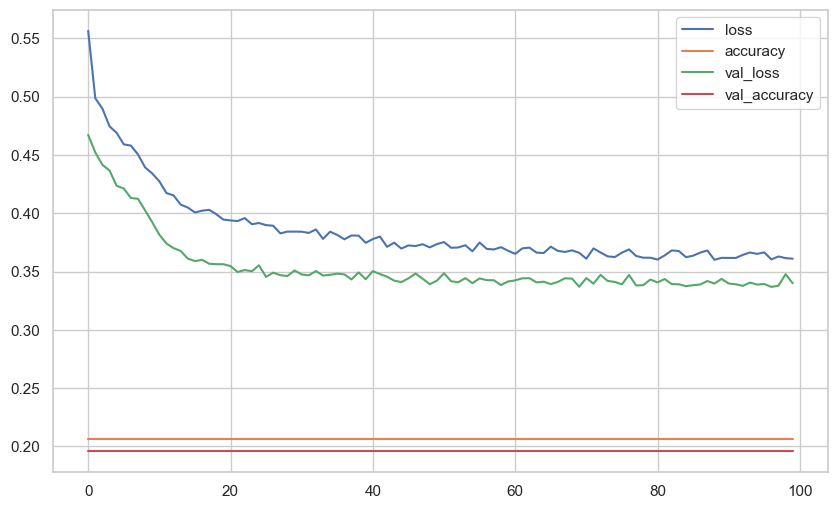

In [80]:
loss_df.plot()
plt.show()

In [81]:
model.evaluate(X_test, y_test, verbose=0)

[0.3435392379760742, 0.1965000033378601]

In [82]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3435392379760742
accuracy:  0.1965000033378601


In [83]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 1s 4ms/step
[[   0 1607]
 [   0  393]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1607
         1.0       0.20      1.00      0.33       393

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.16      2000
weighted avg       0.04      0.20      0.06      2000



### Add Early Stop

In [84]:
# Import EarlyStopping from keras.callbacks module
from keras.callbacks import EarlyStopping
# Step 3: Define EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Step 1: Create the model
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Step 2: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop])


Epoch 1/100
200/200 [==============================] - 7s 13ms/step - loss: 0.5528 - accuracy: 0.7455 - val_loss: 0.4845 - val_accuracy: 0.7987
Epoch 2/100
200/200 [==============================] - 2s 8ms/step - loss: 0.4835 - accuracy: 0.7934 - val_loss: 0.4569 - val_accuracy: 0.8075
Epoch 3/100
200/200 [==============================] - 1s 7ms/step - loss: 0.4629 - accuracy: 0.8005 - val_loss: 0.4391 - val_accuracy: 0.8206
Epoch 4/100
200/200 [==============================] - 1s 7ms/step - loss: 0.4462 - accuracy: 0.8114 - val_loss: 0.4240 - val_accuracy: 0.8200
Epoch 5/100
200/200 [==============================] - 1s 7ms/step - loss: 0.4348 - accuracy: 0.8183 - val_loss: 0.4117 - val_accuracy: 0.8281
Epoch 6/100
200/200 [==============================] - 1s 7ms/step - loss: 0.4196 - accuracy: 0.8247 - val_loss: 0.4013 - val_accuracy: 0.8394
Epoch 7/100
200/200 [==============================] - 1s 7ms/step - loss: 0.4070 - accuracy: 0.8284 - val_loss: 0.3930 - val_accuracy: 0.840

In [85]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                352       
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 897 (3.50 KB)
Trainable params: 897 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Monitor the "val_loss" as metric

In [ ]:
# Define callbacks
checkpoint_callback = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss', mode='min')
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(x_val, y_val), callbacks=[checkpoint_callback, early_stopping_callback])

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

#### Monitor the "val_recall" as metric

In [110]:
# Define a custom recall metric
class RecallMetric(tf.keras.metrics.Metric):
    def __init__(self, name='recall', **kwargs):
        super(RecallMetric, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
        self.false_negatives = self.add_weight(name='fn', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.argmax(y_true, axis=-1)
        y_pred = tf.argmax(y_pred, axis=-1)
        true_positives = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 1), tf.equal(y_pred, 1)), self.dtype))
        false_negatives = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 1), tf.equal(y_pred, 0)), self.dtype))
        self.true_positives.assign_add(true_positives)
        self.false_negatives.assign_add(false_negatives)

    def result(self):
        recall = self.true_positives / (self.true_positives + self.false_negatives + tf.keras.backend.epsilon())
        return recall

# Define callbacks
checkpoint_callback = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_recall', mode='max')
early_stopping_callback = EarlyStopping(monitor='val_recall', patience=5, mode='max', restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), callbacks=[checkpoint_callback, early_stopping_callback])

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
recall_metric = RecallMetric()
for x_batch, y_batch in zip(x_test, y_test):
    y_pred_batch = model.predict(x_batch)
    recall_metric.update_state(y_batch, y_pred_batch)

test_recall = recall_metric.result().numpy()

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test Recall:", test_recall)

NameError: name 'x_train' is not defined

## Optuna

In [97]:
#!pip install optuna

In [98]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [99]:

trial_metric = "accuracy"
batch_size = 32


def create_model(trial):
    # Some hyperparameters we want to optimize
    input_layer_units = trial.suggest_int("input_layer_units", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(input_layer_units, input_dim=X_train.shape[1], activation="relu"))

    # you can add the hidden layers automatically, see the example below:
    hidden_layers = trial.suggest_int("hidden_layers", 2, 6)
    for i in range(hidden_layers):
      hidden_layer_units = "hidden_layer_units_" + str(i)
      hidden_layer_units = trial.suggest_int(hidden_layer_units, 8, 128)
      model.add(Dense(hidden_layer_units, activation="relu"))


    # we decided to use one neuron with sigmoid func in the output layer
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score



In [109]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-08-08 08:42:01,437] A new study created in memory with name: no-name-be123543-c840-4c10-bd09-de99aef44f13
[I 2023-08-08 08:45:29,479] Trial 0 finished with value: 0.8034999966621399 and parameters: {'input_layer_units': 104, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00013722472609538317, 'hidden_layers': 3, 'hidden_layer_units_0': 52, 'hidden_layer_units_1': 69, 'hidden_layer_units_2': 66, 'w0': 0.17529607984831638, 'w1': 0.1730980069647151}. Best is trial 0 with value: 0.8034999966621399.
[I 2023-08-08 08:50:05,182] Trial 1 finished with value: 0.8259999752044678 and parameters: {'input_layer_units': 70, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.006750457561968258, 'hidden_layers': 5, 'hidden_layer_units_0': 111, 'hidden_layer_units_1': 66, 'hidden_layer_units_2': 29, 'hidden_layer_units_3': 90, 'hidden_layer_units_4': 18, 'w0': 1.9056992530489456, 'w1': 0.10062576003409815}. Best is trial 1 with value: 

{'input_layer_units': 111,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.0026870792451304665,
 'hidden_layers': 3,
 'hidden_layer_units_0': 30,
 'hidden_layer_units_1': 10,
 'hidden_layer_units_2': 84,
 'w0': 0.16030121365622813,
 'w1': 0.41791046798883125}

In [113]:
# build model with optuna parameters
input_layer_units, hidden_layers, optimizer, lr, w0, w1 = (
    study.best_params["input_layer_units"],
    study.best_params["hidden_layers"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

hidden_layer_units_1, hidden_layer_units_2 = (
    study.best_params["hidden_layer_units_0"],
    study.best_params["hidden_layer_units_1"]
)

hidden_layer_units = [
    hidden_layer_units_1,
    hidden_layer_units_2
]
hidden_layers = 2
tf.random.set_seed(42)
# instantiate the model
model = Sequential()
model.add(Dense(input_layer_units, activation="relu"))

for i in range(hidden_layers):
  model.add(Dense(hidden_layer_units[i], activation="relu"))

model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
15/15 [==============================] - 7s 135ms/step - loss: 0.5339 - recall: 0.0336 - val_loss: 0.4885 - val_recall: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 0s 28ms/step - loss: 0.4873 - recall: 0.0000e+00 - val_loss: 0.4730 - val_recall: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 0s 28ms/step - loss: 0.4701 - recall: 0.0013 - val_loss: 0.4389 - val_recall: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 0s 28ms/step - loss: 0.4588 - recall: 0.0410 - val_loss: 0.4232 - val_recall: 0.0955
Epoch 5/100
15/15 [==============================] - 0s 29ms/step - loss: 0.4476 - recall: 0.1365 - val_loss: 0.4134 - val_recall: 0.2038
Epoch 6/100
15/15 [==============================] - 0s 28ms/step - loss: 0.4353 - recall: 0.1829 - val_loss: 0.4219 - val_recall: 0.0382
Epoch 7/100
15/15 [==============================] - 0s 28ms/step - loss: 0.4270 - recall: 0.2017 - val_loss: 0.4140 - val_recall: 0.4522
Epoch 8/100
15/15

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [114]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_107 (Dense)           (None, 111)               1221      
                                                                 
 dense_108 (Dense)           (None, 30)                3360      
                                                                 
 dense_109 (Dense)           (None, 10)                310       
                                                                 
 dense_110 (Dense)           (None, 1)                 11        
                                                                 
Total params: 4902 (19.15 KB)
Trainable params: 4902 (19.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [115]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.5338909029960632,0.03362474963068962,0.48850613832473755,0.0
1,0.4873410761356354,0.0,0.4729793965816498,0.0
2,0.47008374333381653,0.001344989868812263,0.43891769647598267,0.0
3,0.45884621143341064,0.04102219268679619,0.4231555461883545,0.09554140269756317
4,0.44760212302207947,0.1365164816379547,0.4133507013320923,0.20382165908813477


In [116]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 1s 4ms/step
[[1552   55]
 [ 234  159]]
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91      1607
         1.0       0.74      0.40      0.52       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.84      0.86      0.84      2000



63/63 [==============================] - 0s 4ms/step


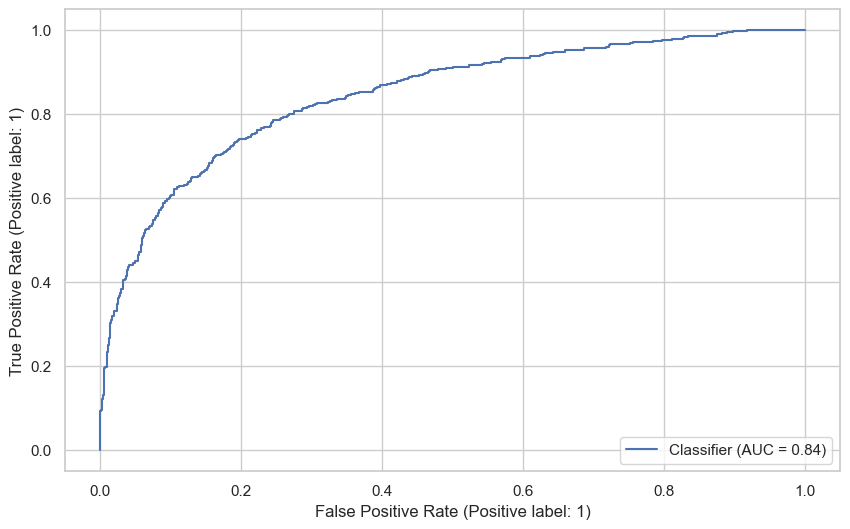

In [117]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

# Final Model and Model Deployment

In [136]:
import pickle

pickle.dump(scaler, open("scaler", "wb"))

In [137]:
final_model = Sequential()

final_model.add(Dense(32, activation = "relu"))
final_model.add(Dense(16, activation = "relu"))
final_model.add(Dense(1, activation = "sigmoid"))  

opt = Adam(lr = 0.005)

final_model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [138]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)


In [139]:
class_weight = {0: 0.62787777, 1: 2.45499182}

In [140]:
final_model.fit(x = X_train, y = y_train, 
                validation_data = (X_test, y_test), 
                batch_size = 32, 
                epochs = 1000, 
                verbose = 1, 
                callbacks = [early_stop], 
                class_weight = class_weight)

Epoch 1/1000
250/250 [==============================] - 7s 11ms/step - loss: 0.6663 - accuracy: 0.5784 - val_loss: 0.6148 - val_accuracy: 0.6640
Epoch 2/1000
250/250 [==============================] - 2s 8ms/step - loss: 0.6266 - accuracy: 0.6388 - val_loss: 0.5989 - val_accuracy: 0.6675
Epoch 3/1000
250/250 [==============================] - 2s 8ms/step - loss: 0.6055 - accuracy: 0.6607 - val_loss: 0.6296 - val_accuracy: 0.6485
Epoch 4/1000
250/250 [==============================] - 2s 7ms/step - loss: 0.5873 - accuracy: 0.6802 - val_loss: 0.6006 - val_accuracy: 0.6795
Epoch 5/1000
250/250 [==============================] - 2s 7ms/step - loss: 0.5689 - accuracy: 0.7079 - val_loss: 0.6138 - val_accuracy: 0.6740
Epoch 6/1000
250/250 [==============================] - 2s 7ms/step - loss: 0.5512 - accuracy: 0.7150 - val_loss: 0.5682 - val_accuracy: 0.7185
Epoch 7/1000
250/250 [==============================] - 2s 7ms/step - loss: 0.5320 - accuracy: 0.7336 - val_loss: 0.5551 - val_accuracy

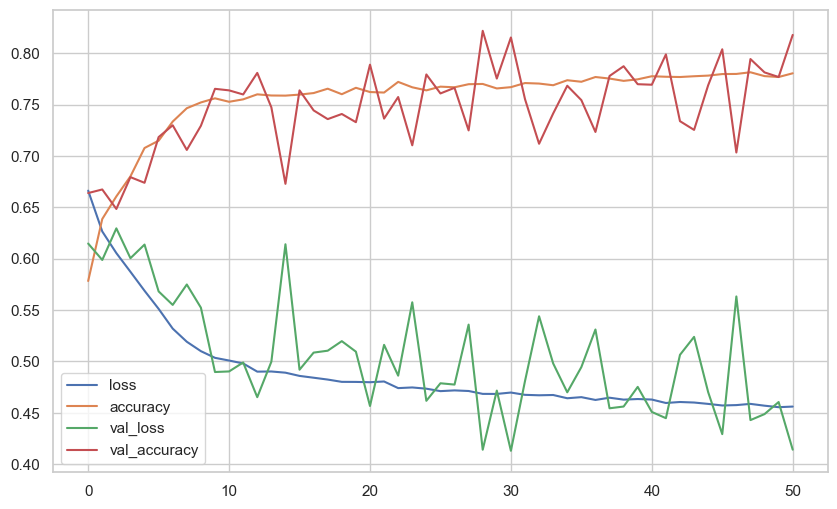

In [141]:
loss_df = pd.DataFrame(final_model.history.history)

loss_df.plot();

In [164]:
model.save('final_model.h5')

## Prediction

In [162]:
from tensorflow.keras.models import load_model

In [165]:
final_model = load_model('final_model.h5')

scaler = pickle.load(open("scaler", "rb"))

In [180]:
random_ten_customer = df.sample(n=10, random_state=42).iloc[0:10, :10]

random_ten_customer

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596.0,1,0,32.0,3.0,96709.07,2.0,0.0,0.0,41788.37
4684,623.0,0,0,43.0,1.0,0.0,2.0,1.0,1.0,146379.3
1731,601.0,2,1,44.0,4.0,0.0,2.0,1.0,0.0,58561.31
4742,506.0,1,0,59.0,8.0,119152.1,2.0,1.0,1.0,170679.74
4521,560.0,2,1,27.0,7.0,124995.98,1.0,1.0,1.0,114669.79
6340,790.0,2,0,37.0,8.0,0.0,2.0,1.0,1.0,149418.41
576,439.0,2,1,32.0,3.0,138901.61,1.0,1.0,0.0,75685.97
5202,597.0,1,1,22.0,6.0,101528.61,1.0,1.0,0.0,70529.0
6363,678.0,2,1,40.0,4.0,113794.22,1.0,1.0,0.0,16618.76
439,464.0,1,1,42.0,3.0,85679.25,1.0,1.0,1.0,164104.74


In [169]:
random_ten_customer_scaled = scaler.transform(random_ten_customer)

random_ten_customer_scaled

array([[0.492     , 0.5       , 0.        , 0.18918919, 0.3       ,
        0.3854516 , 0.33333333, 0.        , 0.        , 0.20861597],
       [0.546     , 0.        , 0.        , 0.33783784, 0.1       ,
        0.        , 0.33333333, 1.        , 1.        , 0.73188283],
       [0.502     , 1.        , 1.        , 0.35135135, 0.4       ,
        0.        , 0.33333333, 1.        , 0.        , 0.29253074],
       [0.312     , 0.5       , 0.        , 0.55405405, 0.8       ,
        0.47490238, 0.33333333, 1.        , 1.        , 0.85345757],
       [0.42      , 1.        , 1.        , 0.12162162, 0.7       ,
        0.49819423, 0.        , 1.        , 1.        , 0.57324062],
       [0.88      , 1.        , 0.        , 0.25675676, 0.8       ,
        0.        , 0.33333333, 1.        , 1.        , 0.74708745],
       [0.178     , 1.        , 1.        , 0.18918919, 0.3       ,
        0.55361765, 0.        , 1.        , 0.        , 0.37820516],
       [0.494     , 0.5       , 1.       

In [170]:
prediction = pd.DataFrame(model_exited.predict(random_ten_customer) > 0.5, columns=['prediction']).astype("float64")
prediction

1/1 [==============================] - 1s 653ms/step


,prediction
0,1.0
1,0.0
2,0.0
3,1.0
4,1.0
5,0.0
6,1.0
7,1.0
8,1.0
9,1.0


In [182]:
actual = pd.DataFrame(df.sample(n=10, random_state=42)["Churn"]).rename({'Churn': 'actual'}, axis=1).astype("float64")
actual 

,actual
6252,0.0
4684,0.0
1731,0.0
4742,0.0
4521,0.0
6340,0.0
576,0.0
5202,1.0
6363,0.0
439,0.0


In [183]:
pred_df = actual.join(prediction.set_index(actual.index))

pred_df

,actual,prediction
6252,0.0,1.0
4684,0.0,0.0
1731,0.0,0.0
4742,0.0,1.0
4521,0.0,1.0
6340,0.0,0.0
576,0.0,1.0
5202,1.0,1.0
6363,0.0,1.0
439,0.0,1.0


In [184]:
pred_df['prediction_accuracy'] = pred_df.apply(lambda x: "TRUE" if int(x['actual'] == x['prediction']) else "FALSE", axis=1)

pred_df

,actual,prediction,prediction_accuracy
6252,0.0,1.0,FALSE
4684,0.0,0.0,TRUE
1731,0.0,0.0,TRUE
4742,0.0,1.0,FALSE
4521,0.0,1.0,FALSE
6340,0.0,0.0,TRUE
576,0.0,1.0,FALSE
5202,1.0,1.0,TRUE
6363,0.0,1.0,FALSE
439,0.0,1.0,FALSE


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___